In [28]:
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 

# 1)

In [40]:
def chi_sq_plot(x):
    x = np.array(x)
    x_bar = np.mean(x,axis=0)
    S_inv = np.linalg.inv(np.cov(x,rowvar=False))
    d_i = [np.matmul(np.matmul(np.transpose(obs-x_bar), S_inv),(obs-x_bar)) 
           for obs in x]
    
    n = len(d_i)
    df = len(x[0])
    q_i = [stats.chi2.ppf((j-0.5)/n,df) for j in range(n)]
    plt.plot(d_i,q_i,'o')
    
    return(plt.show())

In [44]:
mean = [0,0,0]
cov = [[1,0,0],[0,10,0],[0,0,100]]

mean1 = [2,5,8]
cov1 = [[10,0,0],[0,100,0],[0,0,1000]]

In [51]:
X = np.random.multivariate_normal(mean, cov, 10000)
X1 = np.random.multivariate_normal(mean1,cov1,1000)

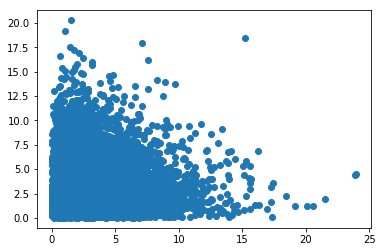

In [50]:
chi_sq_plot(X)

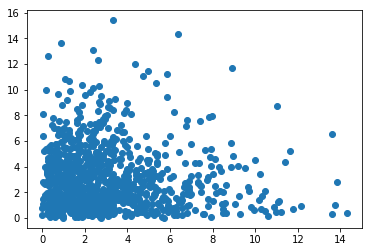

In [52]:
chi_sq_plot(X1)

# 2)

In [50]:
def test_normality(x,alpha):  #True rejects normality, False does not reject
    x = np.array(x)
    x_bar = np.mean(x,axis=0)
    n = len(x) 
    
    q = np.array([stats.norm.ppf(j/(n+n**2)) for j in range(1,n+1)])
    q_bar = np.mean(q)
    
    numerator = sum([(x[i]-x_bar)*(q[i]-q_bar) for i in range(n)])
    denom_x = math.sqrt(sum([(obs-x_bar)**2 for obs in x]))
    denom_q = math.sqrt(sum([(q_i-q_bar)**2 for q_i in q]))
    
    r_Q = numerator/(denom_x*denom_q)
    
    sig_levels = [0.01,0.05,0.1]
    
    if alpha not in sig_levels:
        return(print("Use alpha = 0.01, 0.05, or 0.1"))
    
    if n != 300:
        return(print("Use sample size 300"))
    
    if alpha == 0.01:
        if r_Q < 0.9935:
            return(True)
        
    if alpha == 0.05:
        if r_Q < 0.9953:
            return(True)
        
    if alpha == 0.1:
        if r_Q < 0.9960:
            return(True)
        
    return(False)

In [51]:
mean = 0
var = 1
X = np.random.normal(mean, var, 300)
alpha = 0.01

In [52]:
test_normality(X,alpha)

True